In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import ast
from datetime import datetime
import seaborn as sb
import statistics

In [ ]:
data = pd.read_csv('data.csv', index_col=0)
indices = data.index.tolist()
for i in range(len(indices)):
  indices[i] = datetime.strptime(indices[i], '%Y-%m-%d').date()
data.index = indices
nullList = data.isnull()

dates = data.index.tolist()
new_season = [0]
for i in range(1, len(dates)):
  if dates[i].year > dates[i-1].year:
    new_season.append(i)

def withinFirstTwentyGamedays(index):
  for s in new_season:
    if index >= s and index <= s + 20:
      return True
  return False

for i in range(len(data)):
  for j in range(len(data.columns)):
    if nullList.iloc[i][j] == False:
      data.iloc[i][j] = ast.literal_eval(data.iloc[i][j])

In [ ]:
def findSeasonDayNumber(index):
  for s in range(len(new_season)):
    if index >= 3432:
      return index - new_season[-1]
    elif index >= new_season[s] and index <= new_season[s+1]:
      return index - new_season[s]

# find most recent prior non-null cell (most recent non-off day)
def findMostRecentGameIndex(nullList, index, teamName):
  i = 1
  while nullList.iloc[index-i][teamName] == True:
    i += 1
  return index-i

In [ ]:
# create a list to hold indices of the beginning of each new season
dates = data.index.tolist()
new_season = [0]
for i in range(1, len(dates)):
  if dates[i].year > dates[i-1].year:
    new_season.append(i)
print(new_season)

[0, 181, 362, 542, 722, 904, 1084, 1264, 1445, 1629, 1810, 1990, 2169, 2350, 2530, 2711, 2890, 3069, 3248, 3432]


In [ ]:
# this function is defined at the end of the program for easy of readability
data = addStatistics(data)

Add Features: OBP, ISO, Team_ERA, WHIP, FIP, Log5, Pythagorean Expectation, Whisnant's Equation, Rest Days, etc

In [ ]:
# add OBP, ISO, team ERA, WHIP, FIP, win percentages leading up to each game
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4 and nullList.iloc[i][j] == False:
      data.iloc[i][j]['win%'] = round(data.iloc[i][j]['games_won']/data.iloc[i][j]['games_played'], 5)
      data.iloc[i][j]['OBP'] = round((data.iloc[i][j]['H_to_date'] + data.iloc[i][j]['BB_to_date'] + data.iloc[i][j]['HBP_to_date'])/(data.iloc[i][j]['AB_to_date'] + data.iloc[i][j]['BB_to_date'] + data.iloc[i][j]['HBP_to_date'] + data.iloc[i][j]['SF_to_date']),5)
      data.iloc[i][j]['ISO'] = round((data.iloc[i][j]['doubles_to_date'] + 2*data.iloc[i][j]['triples_to_date'] + 3*data.iloc[i][j]['HR_to_date'])/data.iloc[i][j]['AB_to_date'],5)
      singles = data.iloc[i][j]['H_to_date'] - (data.iloc[i][j]['doubles_to_date'] + data.iloc[i][j]['triples_to_date'] + data.iloc[i][j]['HR_to_date'])
      data.iloc[i][j]['SLG'] = round((singles + 2*data.iloc[i][j]['doubles_to_date'] + 3*data.iloc[i][j]['triples_to_date'] + 4*data.iloc[i][j]['HR_to_date'])/data.iloc[i][j]['AB_to_date'],5)
      data.iloc[i][j]['team_ERA'] = round(9*data.iloc[i][j]['ER_to_date']/data.iloc[i][j]['IP_to_date'],4)
      data.iloc[i][j]['team_WHIP'] = round((data.iloc[i][j]['H_conceded_to_date'] + data.iloc[i][j]['BB_conceded_to_date'])/data.iloc[i][j]['IP_to_date'],4)
      data.iloc[i][j]['team_FIP'] = round((13*data.iloc[i][j]['HR_conceded_to_date'] + 3*(data.iloc[i][j]['BB_conceded_to_date']+data.iloc[i][j]['HBP_conceded_to_date']) - 2*data.iloc[i][j]['K_to_date'])/data.iloc[i][j]['IP_to_date'],5)
      if data.iloc[i][j]['double_header'] == True:
        data.iloc[i][j]['win%(1)'] = round(data.iloc[i][j]['games_won(1)']/data.iloc[i][j]['games_played(1)'], 5)
        data.iloc[i][j]['OBP(1)'] = round((data.iloc[i][j]['H_to_date(1)'] + data.iloc[i][j]['BB_to_date(1)'] + data.iloc[i][j]['HBP_to_date(1)'])/(data.iloc[i][j]['AB_to_date(1)'] + data.iloc[i][j]['BB_to_date(1)'] + data.iloc[i][j]['HBP_to_date(1)'] + data.iloc[i][j]['SF_to_date(1)']),5)
        data.iloc[i][j]['ISO(1)'] = round((data.iloc[i][j]['doubles_to_date(1)'] + 2*data.iloc[i][j]['triples_to_date(1)'] + 3*data.iloc[i][j]['HR_to_date(1)'])/data.iloc[i][j]['AB_to_date(1)'],5)
        singles = data.iloc[i][j]['H_to_date(1)'] - (data.iloc[i][j]['doubles_to_date(1)'] + data.iloc[i][j]['triples_to_date(1)'] + data.iloc[i][j]['HR_to_date(1)'])
        data.iloc[i][j]['SLG(1)'] = round((singles + 2*data.iloc[i][j]['doubles_to_date(1)'] + 3*data.iloc[i][j]['triples_to_date(1)'] + 4*data.iloc[i][j]['HR_to_date(1)'])/data.iloc[i][j]['AB_to_date(1)'],5)
        data.iloc[i][j]['team_ERA(1)'] = round(9*data.iloc[i][j]['ER_to_date(1)']/data.iloc[i][j]['IP_to_date(1)'],4)
        data.iloc[i][j]['team_WHIP(1)'] = round((data.iloc[i][j]['H_conceded_to_date(1)'] + data.iloc[i][j]['BB_conceded_to_date'])/data.iloc[i][j]['IP_to_date(1)'],4)
        data.iloc[i][j]['team_FIP(1)'] = round((13*data.iloc[i][j]['HR_conceded_to_date(1)'] + 3*(data.iloc[i][j]['BB_conceded_to_date(1)']+data.iloc[i][j]['HBP_conceded_to_date(1)']) - 2*data.iloc[i][j]['K_to_date(1)'])/data.iloc[i][j]['IP_to_date(1)'],5)

In [ ]:
# Log5
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4 and nullList.iloc[i][j] == False and data.iloc[i][j]['home/away'] == True:
      W_pct = data.iloc[i][j]['win%']
      opponent_W_pct = data.iloc[i][data.iloc[i][j]['opponent']]['win%']
      data.iloc[i][j]['Log5'] = (W_pct - W_pct*opponent_W_pct) / (W_pct + opponent_W_pct - 2*W_pct*opponent_W_pct)

      if data.iloc[i][j]['double_header'] == True:
        W_pct = data.iloc[i][j]['win%(1)']
        opponent_W_pct = data.iloc[i][data.iloc[i][j]['opponent']]['win%(1)']
        data.iloc[i][j]['Log5(1)'] = (W_pct - W_pct*opponent_W_pct) / (W_pct + opponent_W_pct - 2*W_pct*opponent_W_pct)

In [ ]:
# add away teams' opponents
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4 and nullList.iloc[i][j] == False and data.iloc[i][j]['home/away'] == True:
      for k in range(len(data.columns)):
        if data.columns[k] == data.iloc[i][j]['opponent']:
          data.iloc[i][k]['opponent'] = data.columns[j]

In [ ]:
# Pythogorean Expectation
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4 and nullList.iloc[i][j] == False:
      a = 1.83
      data.iloc[i][j]['Pythagorean'] = (data.iloc[i][j]['runs_to_date']**a)/((data.iloc[i][j]['runs_to_date']**a) + (data.iloc[i][j]['runs_against_to_date']**a))
      if data.iloc[i][j]['double_header'] == True:
        a = 1.83
        data.iloc[i][j]['Pythagorean(1)'] = (data.iloc[i][j]['runs_to_date(1)']**a)/((data.iloc[i][j]['runs_to_date(1)']**a) + (data.iloc[i][j]['runs_against_to_date(1)']**a))

In [ ]:
# Whisnant's Equation
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4 and nullList.iloc[i][j] == False:
      SLG1 = data.iloc[i][j]['SLG']
      SLG2 = data.iloc[i][data.iloc[i][j]['opponent']]['SLG']
      RPG1 = data.iloc[i][j]['runs_to_date']/data.iloc[i][j]['games_played']
      RPG2 = data.iloc[i][data.iloc[i][j]['opponent']]['runs_to_date']/data.iloc[i][data.iloc[i][j]['opponent']]['games_played']
      a = .723*((RPG1 + RPG2)**.373)
      b = .977*((RPG1 + RPG2)**(-.947))
      data.iloc[i][j]['Whisnant'] = ((RPG1/RPG2)**a)*((SLG1/SLG2)**b)/(1+((RPG1/RPG2)**a)*((SLG1/SLG2)**b))

      if data.iloc[i][j]['double_header'] == True:
        SLG1 = data.iloc[i][j]['SLG(1)']
        SLG2 = data.iloc[i][data.iloc[i][j]['opponent']]['SLG(1)']
        RPG1 = data.iloc[i][j]['runs_to_date(1)']/data.iloc[i][j]['games_played(1)']
        RPG2 = data.iloc[i][data.iloc[i][j]['opponent']]['runs_to_date(1)']/data.iloc[i][data.iloc[i][j]['opponent']]['games_played(1)']
        a = .723*((RPG1 + RPG2)**.373)
        b = .977*((RPG1 + RPG2)**(-.947))
        data.iloc[i][j]['Whisnant(1)'] = ((RPG1/RPG2)**a)*((SLG1/SLG2)**b)/(1+((RPG1/RPG2)**a)*((SLG1/SLG2)**b))

In [ ]:
# add # of rest days, boolean values for whether or not yesterday was a double header
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4 and nullList.iloc[i][j] == False:
      if nullList.iloc[i-1][j] == True:
        data.iloc[i][j]['rest'] = True
        d = 2
        restDays = 1
        while nullList.iloc[i-d][j] == True:
          restDays += 1
          d += 1
        data.iloc[i][j]['rest_days'] = restDays
      else:
        data.iloc[i][j]['rest'] = False
        data.iloc[i][j]['rest_days'] = 0
      # double header boolean
      if nullList.iloc[i-1][j] == False:
        if data.iloc[i-1][j]['double_header'] == True:
          data.iloc[i][j]['doubleheader_prev'] = 1
        else:
          data.iloc[i][j]['doubleheader_prev'] = 0
      else:
        data.iloc[i][j]['doubleheader_prev'] = 0

In [ ]:
# add 3-game, 5-game, ... 15-game trailing OBP to each game 
lookBackDays = np.arange(3,17,2)
for l in lookBackDays:
  for i in range(range(len(data)):
    for j in range(len(data.columns)):
      if indices[i].month > 4 and nullList.iloc[i][j] == False:
        numerator = 0
        denominator = 0
        numGames = l
        g = i-1
        while numGames > 0:
          if nullList.iloc[g][j] == False:
            if data.iloc[g][j]['double_header'] == False:
              numerator += data.iloc[g][j]['H'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP']
              denominator += data.iloc[g][j]['AB'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP'] + data.iloc[g][j]['SF']
              print(denominator)
              numGames -= 1
            elif data.iloc[g][j]['double_header'] == True:         
              numerator += data.iloc[g][j]['H(1)'] + data.iloc[g][j]['BB(1)'] + data.iloc[g][j]['HBP(1)']
              denominator += data.iloc[g][j]['AB(1)'] + data.iloc[g][j]['BB(1)'] + data.iloc[g][j]['HBP(1)'] + data.iloc[g][j]['SF(1)']
              print(denominator)
              numGames -= 1
              if numGames == 0:
                break
              numerator += data.iloc[g][j]['H'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP']
              denominator += data.iloc[g][j]['AB'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP'] + data.iloc[g][j]['SF']
              print(denominator)         
              numGames -= 1
            else:
              print('error')
          g -= 1
        data.iloc[i][j]['OBP_' + str(l) + '-day_avg'] = round(numerator/denominator, 5)
        print(numerator)
        print(denominator)
        
        if data.iloc[i][j]['double_header'] == True:
          numerator = 0
          denominator = 0
          numGames = l
          g = i-1
          numerator += data.iloc[i][j]['H'] + data.iloc[i][j]['BB'] + data.iloc[i][j]['HBP']
          denominator += data.iloc[i][j]['AB'] + data.iloc[i][j]['BB'] + data.iloc[i][j]['HBP'] + data.iloc[i][j]['SF']
          numGames -= 1
          while numGames > 0:
            if nullList.iloc[g][j] == False:
              if data.iloc[g][j]['double_header'] == False:
                try:
                  numerator += data.iloc[g][j]['H'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP']
                  denominator += data.iloc[g][j]['AB'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP'] + data.iloc[g][j]['SF']
                except:
                  print(g)
                  print(j)
                numGames -= 1
              elif data.iloc[g][j]['double_header'] == True:
                try:
                  numerator += data.iloc[g][j]['H(1)'] + data.iloc[g][j]['BB(1)'] + data.iloc[g][j]['HBP(1)']
                  denominator += data.iloc[g][j]['AB(1)'] + data.iloc[g][j]['BB(1)'] + data.iloc[g][j]['HBP(1)'] + data.iloc[g][j]['SF(1)']
                  numGames -= 1
                  if numGames == 0:
                    break
                  numerator += data.iloc[g][j]['H'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP']
                  denominator += data.iloc[g][j]['AB'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP'] + data.iloc[g][j]['SF']
                except:
                  print(g)
                  print(j)
                numGames -= 1
              else:
                print('error')
            g -= 1
          data.iloc[i][j]['OBP_' + str(l) + '-day_avg(1)'] = round(numerator/denominator, 5)

In [ ]:
# 10-game trailing OBP, WHIP, and SLG
l = 10
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4 and nullList.iloc[i][j] == False:
      numerator = 0
      denominator = 0
      nSLG = 0
      dSLG = 0
      nWHIP = 0
      dWHIP = 0
      numGames = l
      g = i-1
      while numGames > 0:
        if nullList.iloc[g][j] == False:
          if data.iloc[g][j]['double_header'] == False:
            numerator += data.iloc[g][j]['H'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP']
            denominator += data.iloc[g][j]['AB'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP'] + data.iloc[g][j]['SF']
            non_singles = data.iloc[g][j]['2B'] + data.iloc[g][j]['3B'] + data.iloc[g][j]['HR']
            nSLG += (data.iloc[g][j]['H'] - non_singles) + 2*data.iloc[g][j]['2B'] + 3*data.iloc[g][j]['3B'] + 4*data.iloc[g][j]['HR']
            dSLG += data.iloc[g][j]['AB']
            nWHIP += data.iloc[g][j]['H_conceded'] + data.iloc[g][j]['BB_conceded']
            dWHIP += data.iloc[g][j]['IP']
            numGames -= 1
          elif data.iloc[g][j]['double_header'] == True:         
            numerator += data.iloc[g][j]['H(1)'] + data.iloc[g][j]['BB(1)'] + data.iloc[g][j]['HBP(1)']
            denominator += data.iloc[g][j]['AB(1)'] + data.iloc[g][j]['BB(1)'] + data.iloc[g][j]['HBP(1)'] + data.iloc[g][j]['SF(1)']
            non_singles = data.iloc[g][j]['2B(1)'] + data.iloc[g][j]['3B(1)'] + data.iloc[g][j]['HR(1)']
            nSLG += (data.iloc[g][j]['H(1)'] - non_singles) + 2*data.iloc[g][j]['2B(1)'] + 3*data.iloc[g][j]['3B(1)'] + 4*data.iloc[g][j]['HR(1)']
            dSLG += data.iloc[g][j]['AB(1)']
            nWHIP += data.iloc[g][j]['H_conceded(1)'] + data.iloc[g][j]['BB_conceded(1)']
            dWHIP += data.iloc[g][j]['IP(1)']
            numGames -= 1
            if numGames == 0:
              break
            numerator += data.iloc[g][j]['H'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP']
            denominator += data.iloc[g][j]['AB'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP'] + data.iloc[g][j]['SF']
            non_singles = data.iloc[g][j]['2B'] + data.iloc[g][j]['3B'] + data.iloc[g][j]['HR']
            nSLG += (data.iloc[g][j]['H'] - non_singles) + 2*data.iloc[g][j]['2B'] + 3*data.iloc[g][j]['3B'] + 4*data.iloc[g][j]['HR']
            dSLG += data.iloc[g][j]['AB']
            nWHIP += data.iloc[g][j]['H_conceded'] + data.iloc[g][j]['BB_conceded']
            dWHIP += data.iloc[g][j]['IP']  
            numGames -= 1
        g -= 1
      data.iloc[i][j]['OBP_' + str(l) + '-day_avg'] = round(numerator/denominator, 5)
      data.iloc[i][j]['SLG_' + str(l) + '-day_avg'] = round(nSLG/dSLG, 5)
      data.iloc[i][j]['WHIP_' + str(l) + '-day_avg'] = round(nWHIP/dWHIP, 5)

      if data.iloc[i][j]['double_header'] == True:
        numerator = 0
        denominator = 0
        nSLG = 0
        dSLG = 0
        nWHIP = 0
        dWHIP = 0
        numGames = l
        g = i-1
        numerator += data.iloc[i][j]['H'] + data.iloc[i][j]['BB'] + data.iloc[i][j]['HBP']
        denominator += data.iloc[i][j]['AB'] + data.iloc[i][j]['BB'] + data.iloc[i][j]['HBP'] + data.iloc[i][j]['SF']
        non_singles = data.iloc[i][j]['2B'] + data.iloc[i][j]['3B'] + data.iloc[i][j]['HR']
        nSLG += (data.iloc[i][j]['H'] - non_singles) + 2*data.iloc[i][j]['2B'] + 3*data.iloc[i][j]['3B'] + 4*data.iloc[i][j]['HR']
        dSLG += data.iloc[i][j]['AB']
        nWHIP += data.iloc[i][j]['H_conceded'] + data.iloc[i][j]['BB_conceded']
        dWHIP += data.iloc[i][j]['IP']
        numGames -= 1
        while numGames > 0:
          if nullList.iloc[g][j] == False:
            if data.iloc[g][j]['double_header'] == False:
              numerator += data.iloc[g][j]['H'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP']
              denominator += data.iloc[g][j]['AB'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP'] + data.iloc[g][j]['SF']
              non_singles = data.iloc[g][j]['2B'] + data.iloc[g][j]['3B'] + data.iloc[g][j]['HR']
              nSLG += (data.iloc[g][j]['H'] - non_singles) + 2*data.iloc[g][j]['2B'] + 3*data.iloc[g][j]['3B'] + 4*data.iloc[g][j]['HR']
              dSLG += data.iloc[g][j]['AB']
              nWHIP += data.iloc[g][j]['H_conceded'] + data.iloc[g][j]['BB_conceded']
              dWHIP += data.iloc[g][j]['IP']
              numGames -= 1
            elif data.iloc[g][j]['double_header'] == True:
              numerator += data.iloc[g][j]['H(1)'] + data.iloc[g][j]['BB(1)'] + data.iloc[g][j]['HBP(1)']
              denominator += data.iloc[g][j]['AB(1)'] + data.iloc[g][j]['BB(1)'] + data.iloc[g][j]['HBP(1)'] + data.iloc[g][j]['SF(1)']
              non_singles = data.iloc[g][j]['2B(1)'] + data.iloc[g][j]['3B(1)'] + data.iloc[g][j]['HR(1)']
              nSLG += (data.iloc[g][j]['H(1)'] - non_singles) + 2*data.iloc[g][j]['2B(1)'] + 3*data.iloc[g][j]['3B(1)'] + 4*data.iloc[g][j]['HR(1)']
              dSLG += data.iloc[g][j]['AB(1)']
              nWHIP += data.iloc[g][j]['H_conceded(1)'] + data.iloc[g][j]['BB_conceded(1)']
              dWHIP += data.iloc[g][j]['IP(1)']
              numGames -= 1
              if numGames == 0:
                break
              numerator += data.iloc[g][j]['H'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP']
              denominator += data.iloc[g][j]['AB'] + data.iloc[g][j]['BB'] + data.iloc[g][j]['HBP'] + data.iloc[g][j]['SF']
              non_singles = data.iloc[g][j]['2B'] + data.iloc[g][j]['3B'] + data.iloc[g][j]['HR']
              nSLG += (data.iloc[g][j]['H'] - non_singles) + 2*data.iloc[g][j]['2B'] + 3*data.iloc[g][j]['3B'] + 4*data.iloc[g][j]['HR']
              dSLG += data.iloc[g][j]['AB']
              nWHIP += data.iloc[g][j]['H_conceded'] + data.iloc[g][j]['BB_conceded']
              dWHIP += data.iloc[g][j]['IP']
              numGames -= 1
          g -= 1
        data.iloc[i][j]['OBP_' + str(l) + '-day_avg(1)'] = round(numerator/denominator, 5)
        data.iloc[i][j]['SLG_' + str(l) + '-day_avg(1)'] = round(nSLG/dSLG, 5)
        data.iloc[i][j]['WHIP_' + str(l) + '-day_avg(1)'] = round(nWHIP/dWHIP, 5)

The Following Code Aims to Develop a Consistency Metric Based on the Distribution of Runs Scored (Also contains some old analysis)

In [ ]:
l = 25
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4 and nullList.iloc[i][j] == False:
      runs = []
      runsAgainst = []
      numGames = l
      g = i-1
      while numGames > 0:
        if nullList.iloc[g][j] == False:
          if data.iloc[g][j]['double_header'] == False:
            runs.append(int(data.iloc[g][j]['runs_for']))
            runsAgainst.append(int(data.iloc[g][j]['runs_against']))
          elif data.iloc[g][j]['double_header'] == True:
            runs.append(int(data.iloc[g][j]['runs_for(1)']))
            runsAgainst.append(int(data.iloc[g][j]['runs_against(1)']))    
            numGames -= 1
            if numGames == 0:
              break
            runs.append(int(data.iloc[g][j]['runs_for']))
            runsAgainst.append(int(data.iloc[g][j]['runs_against']))
          numGames -= 1
        g -= 1
      data.iloc[i][j]['runs_25-day_avg'] = sum(runs)/len(runs)
      data.iloc[i][j]['runs_25-day_STD'] = statistics.pstdev(runs)
      data.iloc[i][j]['runs_against_25-day_avg'] = sum(runsAgainst)/len(runsAgainst)
      data.iloc[i][j]['runs__against_25-day_STD'] = statistics.pstdev(runsAgainst)

      if data.iloc[i][j]['double_header'] == True:
        runs = []
        runsAgainst = []
        numGames = l
        g = i-1
        runs.append(int(data.iloc[i][j]['runs_for']))
        runsAgainst.append(int(data.iloc[i][j]['runs_against']))
        numGames -= 1
        while numGames > 0:
          if nullList.iloc[g][j] == False:
            if data.iloc[g][j]['double_header'] == False:
              runs.append(int(data.iloc[g][j]['runs_for']))
              runsAgainst.append(int(data.iloc[g][j]['runs_against']))
            elif data.iloc[g][j]['double_header'] == True:
              runs.append(int(data.iloc[g][j]['runs_for(1)']))
              runsAgainst.append(int(data.iloc[g][j]['runs_against(1)']))
              if numGames == 0:
                break
              runs.append(int(data.iloc[g][j]['runs_for']))
              runsAgainst.append(int(data.iloc[g][j]['runs_against']))
            numGames -= 1
          g -= 1
        data.iloc[i][j]['runs_25-day_avg(1)'] = sum(runs)/len(runs)
        data.iloc[i][j]['runs_25-day_STD(1)'] = statistics.pstdev(runs)
        data.iloc[i][j]['runs_against_25-day_avg(1)'] = sum(runsAgainst)/len(runsAgainst)
        data.iloc[i][j]['runs__against_25-day_STD(1)'] = statistics.pstdev(runsAgainst)

In [ ]:
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4 and nullList.iloc[i][j] == False:
      g = i-1
      runs = []
      runsAgainst = []
      while True:
        if nullList.iloc[g][j] == False:
          runs.append(int(data.iloc[g][j]['runs_for']))
          runsAgainst.append(int(data.iloc[g][j]['runs_against']))
          if data.iloc[g][j]['double_header'] == True:
            runs.append(int(data.iloc[g][j]['runs_for(1)']))
            runsAgainst.append(int(data.iloc[g][j]['runs_against(1)']))
        if dates[g].year != dates[g-1].year:
          break
        g -= 1
      data.iloc[i][j]['runs_STD'] = statistics.pstdev(runs)
      data.iloc[i][j]['runs_against_STD'] = statistics.pstdev(runsAgainst)
      if data.iloc[i][j]['double_header'] == True:
        runs = []
        runsAgainst = []
        g = i-1
        runs.append(int(data.iloc[i][j]['runs_for']))
        runsAgainst.append(int(data.iloc[i][j]['runs_against']))
        while True:
          if nullList.iloc[g][j] == False:
            runs.append(int(data.iloc[g][j]['runs_for']))
            runsAgainst.append(int(data.iloc[g][j]['runs_against']))
            if data.iloc[g][j]['double_header'] == True:
              runs.append(int(data.iloc[g][j]['runs_for(1)']))
              runsAgainst.append(int(data.iloc[g][j]['runs_against(1)']))
          if dates[g].year != dates[g-1].year:
            break
          g -= 1
        data.iloc[i][j]['runs_STD(1)'] = statistics.pstdev(runs)
        data.iloc[i][j]['runs_against_STD(1)'] = statistics.pstdev(runsAgainst)

In [ ]:
# Pythogorean Expectation 10-day
a = 1.83
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4 and nullList.iloc[i][j] == False:
      data.iloc[i][j]['Pythagorean_10-day'] = (data.iloc[i][j]['runs_10-day']**a)/((data.iloc[i][j]['runs_10-day']**a) + (data.iloc[i][data.iloc[i][j]['opponent']]['runs_10-day']**a))
      if data.iloc[i][j]['double_header'] == True:
        data.iloc[i][j]['Pythagorean_10-day(1)'] = (data.iloc[i][j]['runs_10-day(1)']**a)/((data.iloc[i][j]['runs_10-day(1)']**a) + (data.iloc[i][data.iloc[i][j]['opponent']]['runs_10-day(1)']**a))

In [ ]:
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4 and nullList.iloc[i][j] == False:
      data.iloc[i][j]['avg_runs'] = data.iloc[i][j]['runs_to_date']/data.iloc[i][j]['games_played']
      data.iloc[i][j]['avg_runs_against'] = data.iloc[i][j]['runs_against_to_date']/data.iloc[i][j]['games_played']
      if data.iloc[i][j]['double_header'] == True:
        data.iloc[i][j]['avg_runs(1)'] = data.iloc[i][j]['runs_to_date(1)']/data.iloc[i][j]['games_played(1)']
        data.iloc[i][j]['avg_runs_against(1)'] = data.iloc[i][j]['runs_against_to_date(1)']/data.iloc[i][j]['games_played(1)']

In [ ]:
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4 and nullList.iloc[i][j] == False:
      data.iloc[i][j]['runsDIFF'] = abs(float(data.iloc[i][j]['runs_for']) - data.iloc[i][j]['avg_runs'])
      data.iloc[i][j]['runs_againstDIFF'] = abs(float(data.iloc[i][j]['runs_against']) - data.iloc[i][j]['avg_runs_against'])
      if data.iloc[i][j]['double_header'] == True:
        data.iloc[i][j]['runsDIFF(1)'] = abs(float(data.iloc[i][j]['runs_for(1)']) - data.iloc[i][j]['avg_runs(1)'])
        data.iloc[i][j]['runs_againstDIFF(1)'] = abs(float(data.iloc[i][j]['runs_against(1)']) - data.iloc[i][j]['avg_runs_against(1)'])

In [ ]:
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month < 5 and nullList.iloc[i][j] == False:
      avgRuns = 4
      avgRunsAgainst = 4
      n = i
      while True:
        n += 1
        if indices[n].month == 5 and nullList.iloc[n][j] == False and data.iloc[n][j]['double_header'] == False:
          try:
            avgRuns = data.iloc[n][j]['avg_runs']
          except:
            print(n)
            print(data.columns[j])
            print(data.iloc[n][j])
          avgRunsAgainst = data.iloc[n][j]['avg_runs_against']
          break
      data.iloc[i][j]['runsDIFF'] = abs(float(data.iloc[i][j]['runs_for']) - avgRuns)
      data.iloc[i][j]['runs_againstDIFF'] = abs(float(data.iloc[i][j]['runs_against']) - avgRunsAgainst)
      if data.iloc[i][j]['double_header'] == True:
        data.iloc[i][j]['runsDIFF(1)'] = abs(float(data.iloc[i][j]['runs_for(1)']) - avgRuns)
        data.iloc[i][j]['runs_againstDIFF(1)'] = abs(float(data.iloc[i][j]['runs_against(1)']) - avgRunsAgainst)

In [ ]:
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4 and nullList.iloc[i][j] == False:
      g = i-1
      runs = []
      runsAgainst = []
      while True:
        if nullList.iloc[g][j] == False:
          try:
            runs.append(int(data.iloc[g][j]['runsDIFF']))
          except:
            print(i)
            print(data.columns[j])
            print(data.iloc[g][j])
          runsAgainst.append(int(data.iloc[g][j]['runs_againstDIFF']))
          if data.iloc[g][j]['double_header'] == True:
            runs.append(int(data.iloc[g][j]['runsDIFF(1)']))
            runsAgainst.append(int(data.iloc[g][j]['runs_againstDIFF(1)']))
        if dates[g].year != dates[g-1].year:
          break
        g -= 1
      try:
        data.iloc[i][j]['runs_consistency'] = statistics.pstdev(runs)/(sum(runs)/len(runs))
      except:
        print(i)
        print(data.columns[j])
        print(runs)
        print(sum(runsAgainst))

      data.iloc[i][j]['runs_against_conistency'] = statistics.pstdev(runsAgainst)/(sum(runsAgainst)/len(runsAgainst))
      
      if data.iloc[i][j]['double_header'] == True:
        runs = []
        runsAgainst = []
        g = i-1
        runs.append(int(data.iloc[i][j]['runsDIFF']))
        runsAgainst.append(int(data.iloc[i][j]['runs_againstDIFF']))
        while True:
          if nullList.iloc[g][j] == False:
            runs.append(int(data.iloc[g][j]['runsDIFF']))
            runsAgainst.append(int(data.iloc[g][j]['runs_againstDIFF']))
            if data.iloc[g][j]['double_header'] == True:
              runs.append(int(data.iloc[g][j]['runsDIFF(1)']))
              runsAgainst.append(int(data.iloc[g][j]['runs_againstDIFF(1)']))
          if dates[g].year != dates[g-1].year:
            break
          g -= 1
        data.iloc[i][j]['runs_consistency(1)'] = statistics.pstdev(runs)/(sum(runs)/len(runs))
        data.iloc[i][j]['runs_against_conistency(1)'] = statistics.pstdev(runsAgainst)/(sum(runsAgainst)/len(runsAgainst))

In [ ]:
runsStatistics = pd.DataFrame(columns = ['avg_runs', 'StdDev'])
runsAgainstStatistics = pd.DataFrame(columns = ['avg_runs_against', 'StdDev'])
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].year == 2019 and indices[i].day == 29 and indices[i].month == 9:
      if nullList.iloc[i][j] == False:
        runsStatistics.loc[len(runsStatistics)] = [data.iloc[i][j]['avg_runs'], data.iloc[i][j]['runs_STD']]
        runsAgainstStatistics.loc[len(runsAgainstStatistics)] = [data.iloc[i][j]['avg_runs_against'], data.iloc[i][j]['runs_against_STD']]
      elif nullList.iloc[i][j] == True:
        g = i-1
        while nullList.iloc[g][j] == True:
          g -= 1
        runsStatistics.loc[len(runsStatistics)] = [data.iloc[g][j]['avg_runs'], data.iloc[g][j]['runs_STD']]
        runsAgainstStatistics.loc[len(runsAgainstStatistics)] = [data.iloc[g][j]['avg_runs_against'], data.iloc[g][j]['runs_against_STD']]
    elif indices[i+1].year > indices[i].year:
      if nullList.iloc[i][j] == False:
        runsStatistics.loc[len(runsStatistics)] = [data.iloc[i][j]['avg_runs'], data.iloc[i][j]['runs_STD']]
        runsAgainstStatistics.loc[len(runsAgainstStatistics)] = [data.iloc[i][j]['avg_runs_against'], data.iloc[i][j]['runs_against_STD']]
      elif nullList.iloc[i][j] == True:
        g = i-1
        while nullList.iloc[g][j] == True:
          g -= 1
        runsStatistics.loc[len(runsStatistics)] = [data.iloc[g][j]['avg_runs'], data.iloc[g][j]['runs_STD']]
        runsAgainstStatistics.loc[len(runsAgainstStatistics)] = [data.iloc[g][j]['avg_runs_against'], data.iloc[g][j]['runs_against_STD']]

In [ ]:
runsStats = pd.DataFrame(columns = ['avg_runs', 'StdDev'])
runsAgainstStats = pd.DataFrame(columns = ['avg_runs_against', 'StdDev'])
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4:
      if nullList.iloc[i][j] == False:
        runsStats.loc[len(runsStats)] = [data.iloc[i][j]['runs_25-day_avg'], data.iloc[i][j]['runs_25-day_STD']]
        runsAgainstStats.loc[len(runsAgainstStats)] = [data.iloc[i][j]['runs_against_25-day_avg'], data.iloc[i][j]['runs__against_25-day_STD']]

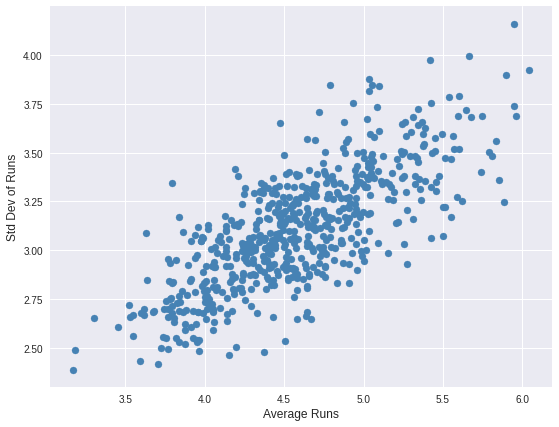

In [ ]:
plt.scatter(runsStatistics['avg_runs'], runsStatistics['StdDev'], color = 'steelblue')
plt.style.use('seaborn')
plt.gcf().set_size_inches(9, 7)
plt.xlabel('Average Runs', fontsize=12)
plt.ylabel('Std Dev of Runs', fontsize=12)
plt.show()

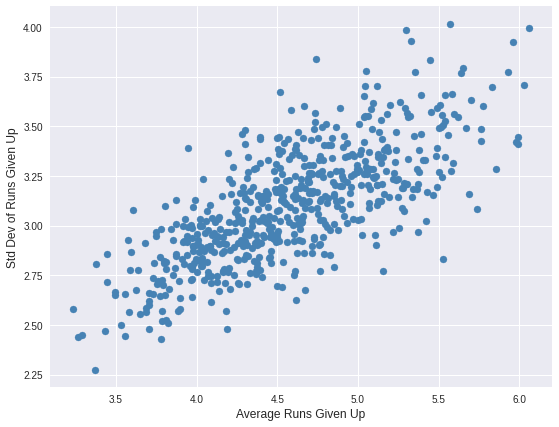

In [ ]:
plt.scatter(runsAgainstStatistics['avg_runs_against'], runsAgainstStatistics['StdDev'], color = 'steelblue')
plt.style.use('seaborn')
plt.gcf().set_size_inches(9,7)
plt.xlabel('Average Runs Given Up', fontsize=12)
plt.ylabel('Std Dev of Runs Given Up', fontsize=12)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
regression = LinearRegression()
x = runsStatistics['avg_runs'][:, np.newaxis]
regression.fit(x, runsStatistics['StdDev'])
impliedStDevForRuns = regression.predict(x)
plt.scatter(runsStatistics['avg_runs'], runsStatistics['StdDev'], color = 'steelblue')
plt.plot(x, impliedStDevForRuns, color='midnightblue')
plt.style.use('seaborn')
plt.gcf().set_size_inches(9,7)
plt.show()

regressionRA = LinearRegression()
x1 = runsAgainstStatistics['avg_runs_against'][:, np.newaxis]
regressionRA.fit(x1, runsStatistics['StdDev'])

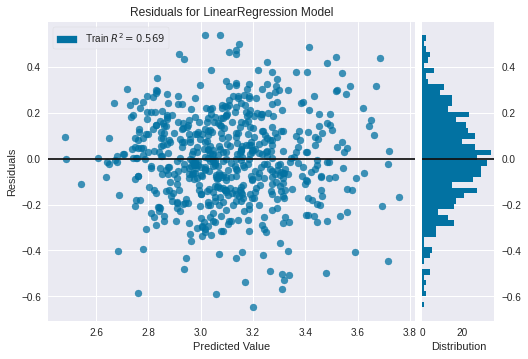

In [ ]:
visualize = ResidualsPlot(regression)
visualize.fit(x, runsStatistics['StdDev'])
visualize.poof()

In [ ]:
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4 and nullList.iloc[i][j] == False:
      data.iloc[i][j]['Predicted_RF_StdDev'] = regression.predict([[(data.iloc[i][j]['avg_runs'])]])[0]
      data.iloc[i][j]['Predicted_RA_StdDev'] = regressionRA.predict([[(data.iloc[i][j]['avg_runs_against'])]])[0]
      if data.iloc[i][j]['double_header'] == True:
        data.iloc[i][j]['Predicted_RF_StdDev(1)'] = regression.predict([[(data.iloc[i][j]['avg_runs(1)'])]])[0]
        data.iloc[i][j]['Predicted_RA_StdDev(1)'] = regressionRA.predict([[(data.iloc[i][j]['avg_runs_against(1)'])]])[0]

In [ ]:
for i in range(len(data)):
  for j in range(len(data.columns)):
    if indices[i].month > 4 and nullList.iloc[i][j] == False:
      data.iloc[i][j]['Predicted_RA_StdDev2'] = reg.predict([[(data.iloc[i][j]['runs_against_25-day_avg'])]])[0]
      if data.iloc[i][j]['double_header'] == True:
        data.iloc[i][j]['Predicted_RA_StdDev2(1)'] = reg.predict([[(data.iloc[i][j]['runs_against_25-day_avg(1)'])]])[0]

In [ ]:
gameData = pd.DataFrame(columns = ['game_date', 'win/loss', 'team', 'opponent', 'ΔPE', 'ΔPE_10d', 'Log5', 'Whisnant', 'ΔOBP', \
                                   'ΔOBP_10d', 'ΔSLG', 'ΔSLG_10d', 'SP_ERA', 'opponent_SP_ERA', 'ΔERA', \
                                   'ΔWHIP', 'ΔWHIP_10d', 'ΔFIP', 'ra_variance', 'opponent_ra_variance']) 

In [ ]:
for i in range(len(data)):
  if indices[i].month > 4:
    for j in range(len(data.columns)):
      if nullList.iloc[i][j] == False and data.iloc[i][j]['home/away'] == True:
        if data.iloc[i][j]['double_header'] == False:
          try:
            gameData.loc[len(gameData)] = [indices[i], float(data.iloc[i][j]['win/loss']), \
                          data.columns[j], data.iloc[i][j]['opponent'], \
                          (data.iloc[i][j]['Pythagorean'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['Pythagorean'])/data.iloc[i][j]['Pythagorean'], \
                          (data.iloc[i][j]['Pythagorean_10-day'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['Pythagorean_10-day'])/data.iloc[i][j]['Pythagorean_10-day'], \
                          data.iloc[i][j]['Log5'], data.iloc[i][j]['Whisnant'], \
                          (data.iloc[i][j]['OBP'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['OBP'])/data.iloc[i][j]['OBP'],\
                          (data.iloc[i][j]['OBP_10-day_avg'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['OBP_10-day_avg'])/data.iloc[i][j]['OBP_10-day_avg'],\
                          (data.iloc[i][j]['SLG'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['SLG'])/data.iloc[i][j]['SLG'], \
                          (data.iloc[i][j]['SLG_10-day_avg'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['SLG_10-day_avg'])/data.iloc[i][j]['SLG_10-day_avg'], \
                          data.iloc[i][j]['pitcher_ERA'], data.iloc[i][j]['opposing_pitcher_ERA']), \
                          (data.iloc[i][j]['team_ERA'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['team_ERA'])/data.iloc[i][j]['team_ERA'], \
                          (data.iloc[i][j]['team_WHIP'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['team_WHIP'])/data.iloc[i][j]['team_WHIP'], \
                          (data.iloc[i][j]['WHIP_10-day_avg'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['WHIP_10-day_avg'])/data.iloc[i][j]['WHIP_10-day_avg'], \
                          (data.iloc[i][j]['team_FIP'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['team_FIP'])/(data.iloc[i][j]['team_FIP'], \
                          data.iloc[i][j]['Predicted_RA_StdDev']-data.iloc[i][j]['runs_against_STD'], data.loc[indices[i]][data.iloc[i][j]['opponent']]['Predicted_RA_StdDev']-data.loc[indices[i]][data.iloc[i][j]['opponent']]['runs_against_STD']]
          except:
            print(indices[i])
            print(data.columns[j])
        if data.iloc[i][j]['double_header'] == True:
          try:
            gameData.loc[len(gameData)] = [indices[i], float(data.iloc[i][j]['win/loss']), \
                          data.columns[j], data.iloc[i][j]['opponent'], \
                          (data.iloc[i][j]['Pythagorean'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['Pythagorean'])/data.iloc[i][j]['Pythagorean'], \
                          (data.iloc[i][j]['Pythagorean_10-day'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['Pythagorean_10-day'])/data.iloc[i][j]['Pythagorean_10-day'], \
                          data.iloc[i][j]['Log5'], data.iloc[i][j]['Whisnant'], \
                          (data.iloc[i][j]['OBP'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['OBP'])/data.iloc[i][j]['OBP'],\
                          (data.iloc[i][j]['OBP_10-day_avg'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['OBP_10-day_avg'])/data.iloc[i][j]['OBP_10-day_avg'],\
                          (data.iloc[i][j]['SLG'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['SLG'])/data.iloc[i][j]['SLG'], \
                          (data.iloc[i][j]['SLG_10-day_avg'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['SLG_10-day_avg'])/data.iloc[i][j]['SLG_10-day_avg'], \
                          data.iloc[i][j]['pitcher_ERA(0)'], data.iloc[i][j]['opposing_pitcher_ERA(0)']), \
                          (data.iloc[i][j]['team_ERA'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['team_ERA'])/data.iloc[i][j]['team_ERA'], \
                          (data.iloc[i][j]['team_WHIP'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['team_WHIP'])/data.iloc[i][j]['team_WHIP'], \
                          (data.iloc[i][j]['WHIP_10-day_avg'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['WHIP_10-day_avg'])/data.iloc[i][j]['WHIP_10-day_avg'], \
                          (data.iloc[i][j]['team_FIP'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['team_FIP'])/(data.iloc[i][j]['team_FIP'], \
                          data.iloc[i][j]['Predicted_RA_StdDev']-data.iloc[i][j]['runs_against_STD'], data.loc[indices[i]][data.iloc[i][j]['opponent']]['Predicted_RA_StdDev']-data.loc[indices[i]][data.iloc[i][j]['opponent']]['runs_against_STD']]
          except:
            print(indices[i])
            print(data.columns[j])
          gameData.loc[len(gameData)] = [indices[i], float(data.iloc[i][j]['win/loss(1)']), \
                        data.columns[j], data.iloc[i][j]['opponent'], \
                          (data.iloc[i][j]['Pythagorean(1)'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['Pythagorean(1)'])/data.iloc[i][j]['Pythagorean(1)'], \
                          (data.iloc[i][j]['Pythagorean_10-day(1)'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['Pythagorean_10-day(1)'])/data.iloc[i][j]['Pythagorean_10-day(1)'], \
                          data.iloc[i][j]['Log5(1)'], data.iloc[i][j]['Whisnant(1)'], \
                          (data.iloc[i][j]['OBP(1)'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['OBP(1)'])/data.iloc[i][j]['OBP(1)'],\
                          (data.iloc[i][j]['OBP_10-day_avg(1)'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['OBP_10-day_avg(1)'])/data.iloc[i][j]['OBP_10-day_avg(1)'],\
                          (data.iloc[i][j]['SLG(1)'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['SLG(1)'])/data.iloc[i][j]['SLG(1)'], \
                          (data.iloc[i][j]['SLG_10-day_avg(1)'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['SLG_10-day_avg(1)'])/data.iloc[i][j]['SLG_10-day_avg(1)'], \
                          data.iloc[i][j]['pitcher_ERA'], data.iloc[i][j]['opposing_pitcher_ERA']), \
                          (data.iloc[i][j]['team_ERA(1)'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['team_ERA(1)'])/data.iloc[i][j]['team_ERA(1)'], \
                          (data.iloc[i][j]['team_WHIP(1)'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['team_WHIP(1)'])/data.iloc[i][j]['team_WHIP(1)'], \
                          (data.iloc[i][j]['WHIP_10-day_avg(1)'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['WHIP_10-day_avg(1)'])/data.iloc[i][j]['WHIP_10-day_avg(1)'], \
                          (data.iloc[i][j]['team_FIP(1)'] - data.loc[indices[i]][data.iloc[i][j]['opponent']]['team_FIP(1)'])/(data.iloc[i][j]['team_FIP(1)'], \
                          data.iloc[i][j]['Predicted_RA_StdDev(1)']-data.iloc[i][j]['runs_against_STD(1)'], data.loc[indices[i]][data.iloc[i][j]['opponent']]['Predicted_RA_StdDev(1)']-data.loc[indices[i]][data.iloc[i][j]['opponent']]['runs_against_STD(1)']]

In [ ]:
for i in range(len(gameData)):
  if gameData.iloc[i, gameData.columns.get_loc('rest')] == True:
    gameData.iloc[i, gameData.columns.get_loc('rest')] = 1
  elif gameData.iloc[i, gameData.columns.get_loc('rest')] == False:
    gameData.iloc[i, gameData.columns.get_loc('rest')] = 0
  if gameData.iloc[i, gameData.columns.get_loc('opponent_rest')] == True:
    gameData.iloc[i, gameData.columns.get_loc('opponent_rest')] = 1
  elif gameData.iloc[i, gameData.columns.get_loc('opponent_rest')] == False:
    gameData.iloc[i, gameData.columns.get_loc('opponent_rest')] = 0

In [ ]:
data.to_csv('extendedData.csv')

In [ ]:
gameData['PE_diff'] = gameData['PE']-gameData['opponent_PE']
gameData['runs_consistency_diff'] = gameData['rf_consistency']-gameData['opponent_rf_consistency']
gameData['ra_consistency_diff'] = gameData['ra_consistency']-gameData['opponent_ra_consistency']
gameData['OBP_diff'] = gameData['OBP']-gameData['opponent_OBP']
gameData['SLG_diff'] = gameData['SLG']-gameData['opponent_SLG']
gameData['ISO_diff'] = gameData['ISO']-gameData['opponent_ISO']
gameData['SP_ERA_Diff'] = gameData['SP_ERA']-gameData['SP_ERA_opponent']
gameData['ERA_diff'] = gameData['team_ERA']-gameData['opponent_team_ERA']
gameData['WHIP_diff'] = gameData['WHIP']-gameData['opponent_WHIP']
gameData['FIP_diff'] = gameData['FIP']-gameData['opponent_FIP']
gameData['rest_diff'] = gameData['rest']-gameData['opponent_rest']
gameData['rest_days_diff'] = gameData['rest_days']-gameData['opponent_rest_days']
gameData['doubleheader_diff'] = gameData['doubleheader_prev']-gameData['opponent_doubleheader_prev']
gameData['OBP_3-day_diff'] = gameData['OBP_3-day_avg']-gameData['opponent_OBP_3-day_avg']
gameData['OBP_5-day_diff'] = gameData['OBP_5-day_avg']-gameData['opponent_OBP_5-day_avg']
gameData['OBP_7-day_diff'] = gameData['OBP_7-day_avg']-gameData['opponent_OBP_7-day_avg']
gameData['OBP_9-day_diff'] = gameData['OBP_9-day_avg']-gameData['opponent_OBP_9-day_avg']
gameData['OBP_11-day_diff'] = gameData['OBP_11-day_avg']-gameData['opponent_OBP_11-day_avg']
gameData['OBP_13-day_diff'] = gameData['OBP_13-day_avg']-gameData['opponent_OBP_13-day_avg']
gameData['OBP_15-day_diff'] = gameData['OBP_15-day_avg']-gameData['opponent_OBP_15-day_avg']
gameData['runs_7-day_diff'] = gameData['runs_7-day']-gameData['opponent_runs_7-day']
gameData['runs_disp_7-day_diff'] = gameData['runs_disp_7-day']-gameData['opponent_runs_disp_7-day']
gameData['PE_diff_7-day'] = gameData['PE_7-day']-gameData['opponent_PE_7-day']

In [ ]:
gameData.head()

,game_date,win/loss,Log5,Whisnant,Pythagorean,opponent_Pythagorean,OBP,opponent_OBP,SLG,opponent_SLG,ISO,opponent_ISO,SP_ERA,SP_ERA_opponent,team_ERA,opponent_team_ERA,WHIP,opponent_WHIP,FIP,opponent_FIP,rest,opponent_rest,rest_days,opponent_rest_days,doubleheader_prev,opponent_doubleheader_prev,OBP_3-day_avg,opponent_OBP_3-day_avg,OBP_5-day_avg,opponent_OBP_5-day_avg,OBP_7-day_avg,opponent_OBP_7-day_avg,OBP_9-day_avg,opponent_OBP_9-day_avg,OBP_11-day_avg,opponent_OBP_11-day_avg,OBP_13-day_avg,opponent_OBP_13-day_avg,OBP_15-day_avg,opponent_OBP_15-day_avg,PE_diff,OBP_diff,SLG_diff,ISO_diff,ERA_diff,WHIP_diff,FIP_diff,rest_diff,rest_days_diff,doubleheader_diff,OBP_3-day_diff,OBP_5-day_diff,OBP_7-day_diff,OBP_9-day_diff,OBP_11-day_diff,OBP_13-day_diff,OBP_15-day_diff
0,2000-05-01,0.0,0.712574,0.626283,0.634183,0.408649,0.37288,0.34608,0.51192,0.49554,0.20772,0.21429,6.33,5.01,4.5595,6.4229,1.4802,1.6696,1.98678,2.26872,False,False,0,0,0,0,0.28696,0.30357,0.34673,0.30435,0.34432,0.29119,0.36236,0.30952,0.36215,0.35142,0.36863,0.36095,0.36301,0.36007,0.225534,0.02680,0.01638,-0.00657,-1.8634,-0.1894,-0.28194,0,0,0,-0.01661,0.04238,0.05313,0.05284,0.01073,0.00768,0.00294
1,2000-05-01,0.0,0.500000,0.492624,0.432864,0.549922,0.34544,0.34350,0.47011,0.42773,0.18506,0.17536,5.2,5.12,5.7710,4.2800,1.5618,1.4489,2.59237,1.16889,False,False,0,0,0,0,0.39450,0.31356,0.40933,0.34010,0.37828,0.32734,0.36888,0.34615,0.34928,0.36404,0.33128,0.36685,0.33628,0.35902,-0.117058,0.00194,0.04238,0.00970,1.4910,0.1129,1.42348,0,0,0,0.08094,0.06923,0.05094,0.02273,-0.01476,-0.03557,-0.02274
2,2000-05-01,0.0,0.318179,0.588245,0.630610,0.667481,0.35319,0.35144,0.47052,0.43038,0.20698,0.16456,4.11,3.38,3.9794,3.0822,1.3978,1.2192,2.10618,0.82648,False,False,0,0,0,0,0.43802,0.32540,0.39109,0.35025,0.34717,0.35094,0.36798,0.35417,0.36530,0.36496,0.36133,0.35861,0.36041,0.36121,-0.036871,0.00175,0.04014,0.04242,0.8972,0.1786,1.27970,0,0,0,0.11262,0.04084,-0.00377,0.01381,0.00034,0.00272,-0.00080
3,2000-05-01,1.0,0.335589,0.515791,0.443541,0.577109,0.35677,0.33922,0.45660,0.44882,0.17360,0.17979,4.73,2.57,6.2113,4.1471,1.6948,1.3088,2.29577,1.00000,False,False,0,0,0,0,0.39683,0.29091,0.36041,0.34392,0.35206,0.33969,0.34118,0.34431,0.33415,0.34653,0.35785,0.33613,0.36014,0.32784,-0.133568,0.01755,0.00778,-0.00619,2.0642,0.3860,1.29577,0,0,0,0.10592,0.01649,0.01237,-0.00313,-0.01238,0.02172,0.03230
4,2000-05-01,0.0,0.482763,0.334315,0.371343,0.477217,0.31702,0.35556,0.39900,0.43775,0.16060,0.19545,6.11,5.04,4.9920,6.0982,1.6013,1.5908,2.71061,2.31260,False,False,0,0,0,0,0.29091,0.42308,0.30220,0.39048,0.29412,0.40484,0.30030,0.38978,0.30435,0.38950,0.30675,0.37476,0.30216,0.37908,-0.105874,-0.03854,-0.03875,-0.03485,-1.1062,0.0105,0.39801,0,0,0,-0.13217,-0.08828,-0.11072,-0.08948,-0.08515,-0.06801,-0.07692


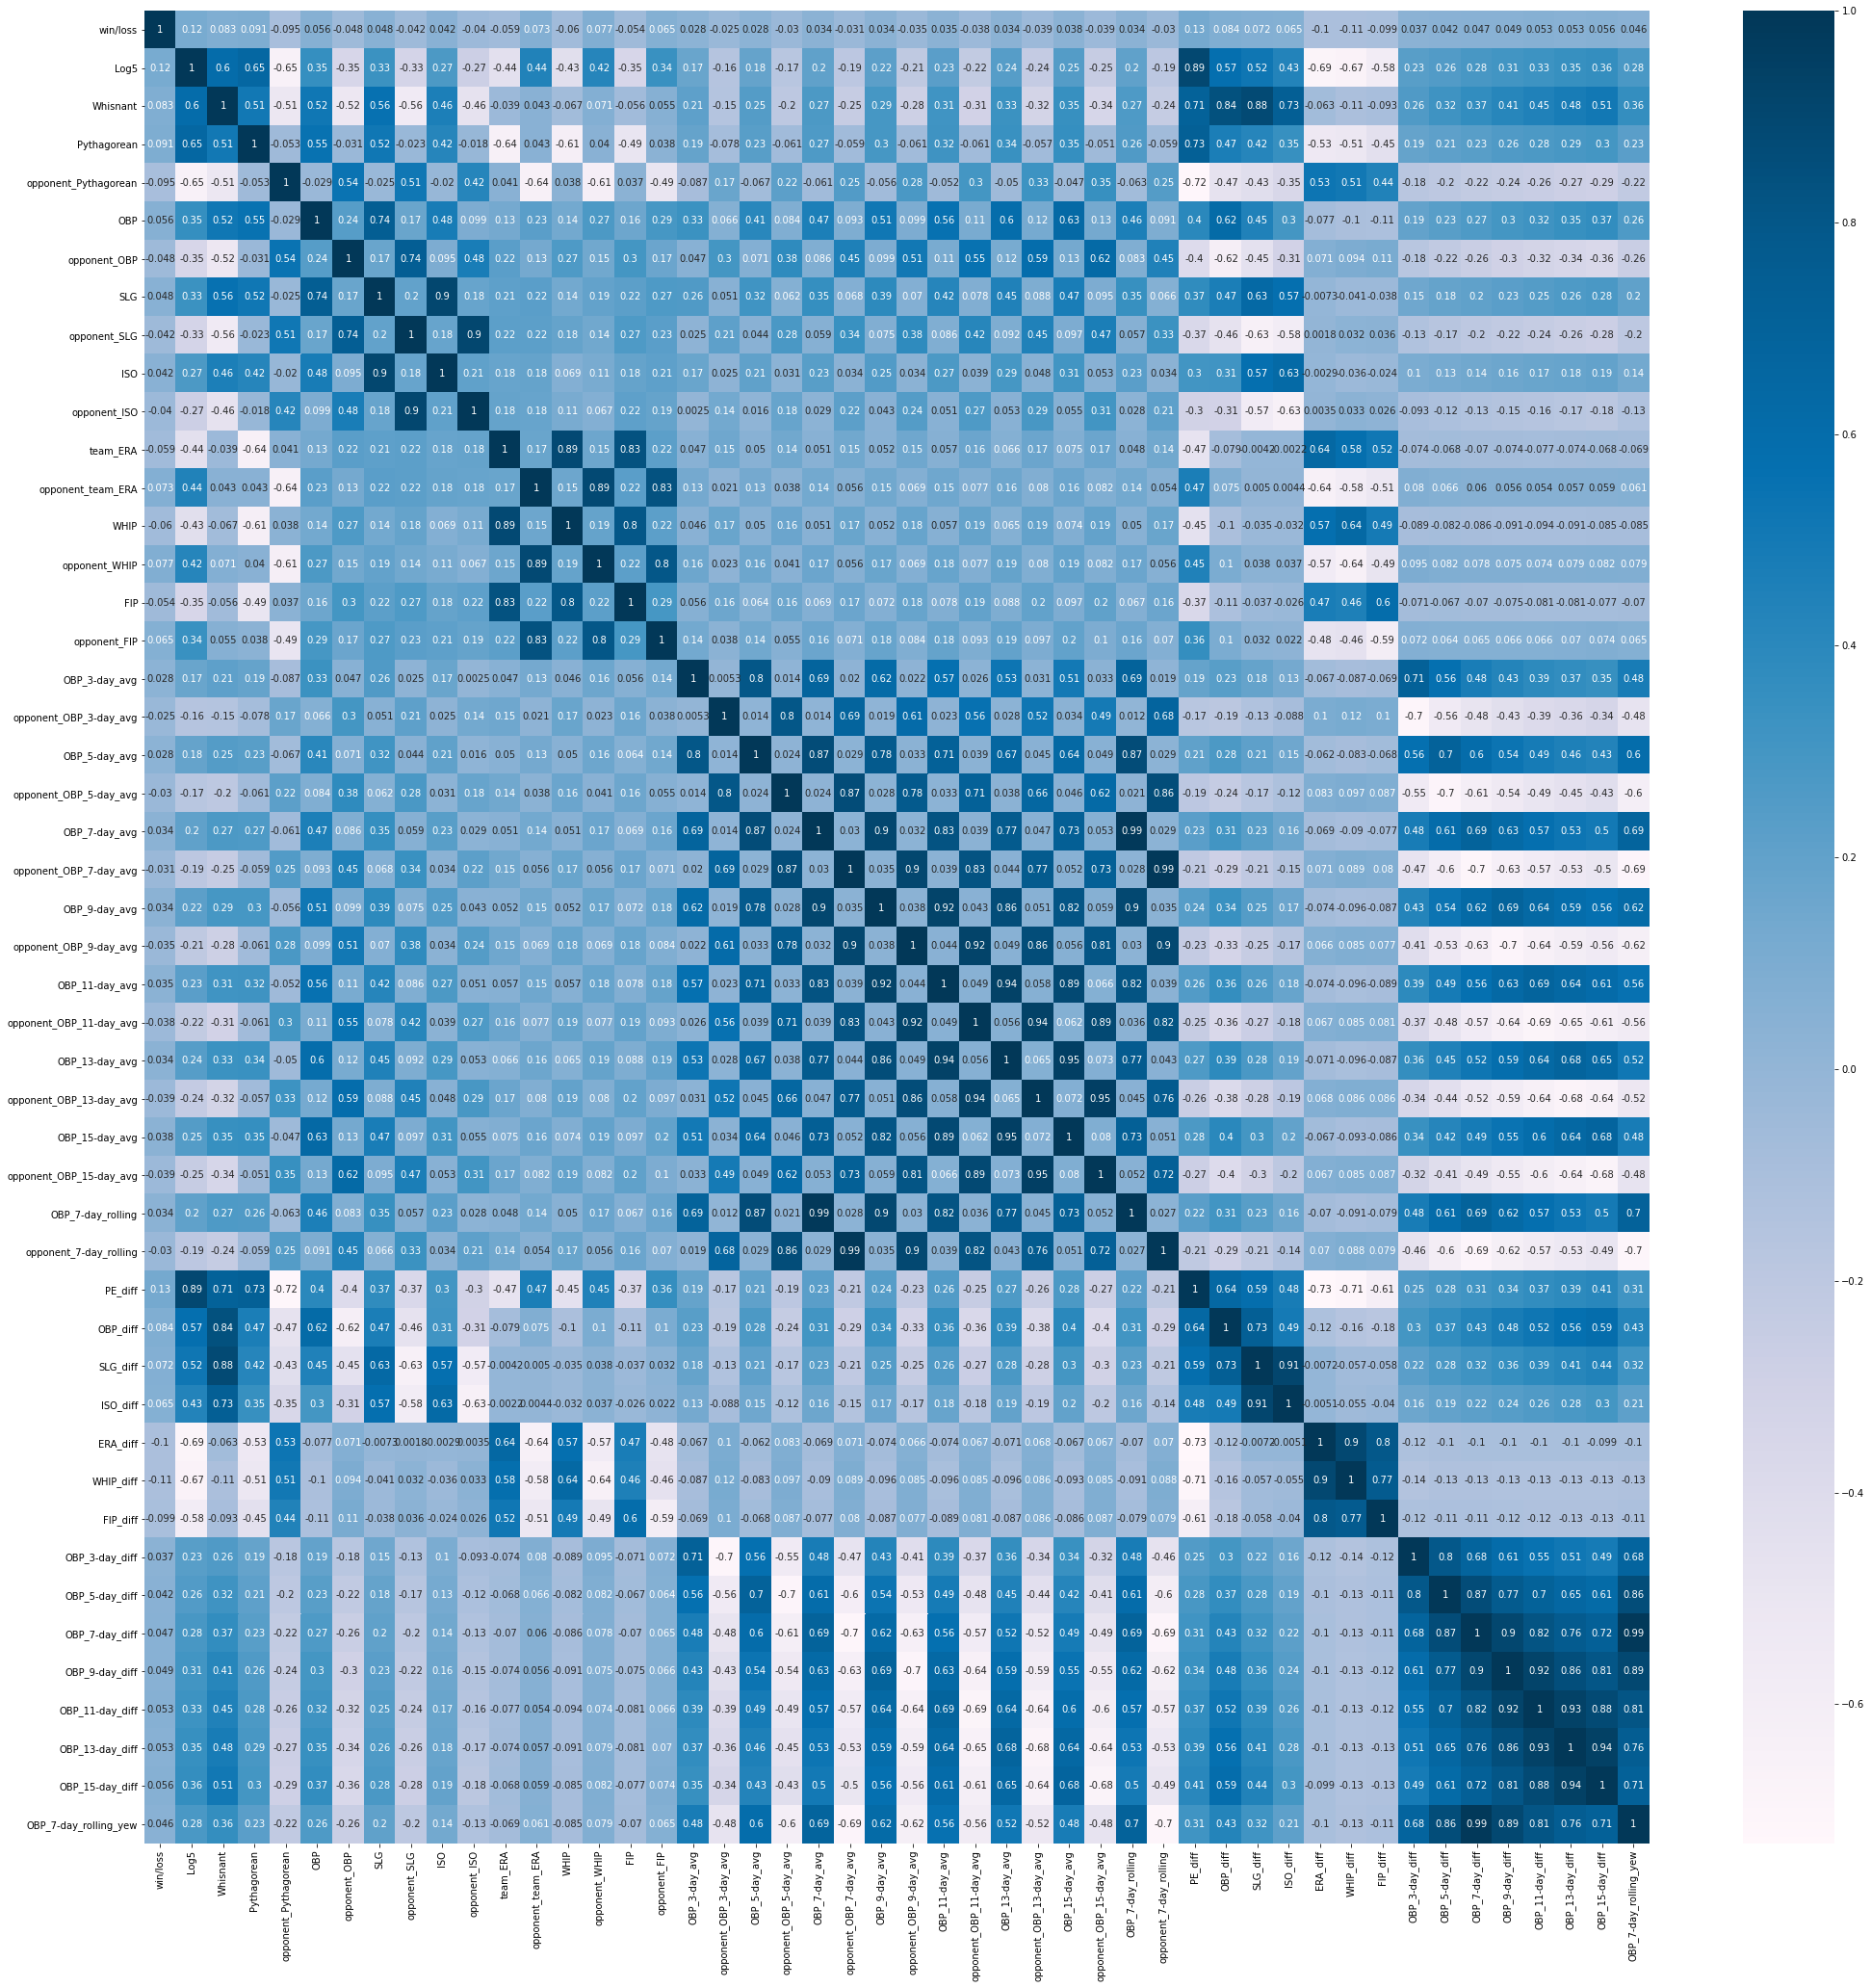

In [ ]:
# old Analysis
plt.figure(figsize=(35,35))
heatmap = sb.heatmap(gameData.corr(), annot=True, cmap='PuBu')

In [ ]:
def addStatistics(data):
  for i in range(len(data)):
    for j in range(len(data.columns)):
      if indices[i].month > 4 and nullList.iloc[i][j] == False:
        g = i-1
        gamesWon = 0
        gamesPlayed = 0
        runs_to_date = 0
        runs_against_to_date = 0
        AB_to_date = 0
        H_to_date = 0
        BB_to_date = 0
        HBP_to_date = 0
        SF_to_date = 0
        doubles_to_date  = 0
        triples_to_date = 0
        HR_to_date = 0
        H_conceded_to_date = 0
        IP_to_date = 0
        BB_conceded_to_date = 0
        HBP_conceded_to_date = 0
        ER_to_date = 0
        K_to_date = 0
        HR_conceded_to_date = 0

        while True:
          if nullList.iloc[g][j] == False:
            runs_to_date += data.iloc[g][j]['runs_for']
            runs_against_to_date += data.iloc[g][j]['runs_against']
            AB_to_date += data.iloc[g][j]['AB']
            H_to_date += data.iloc[g][j]['H']
            BB_to_date += data.iloc[g][j]['BB']
            HBP_to_date += data.iloc[g][j]['HBP']
            SF_to_date += data.iloc[g][j]['SF']
            doubles_to_date += data.iloc[g][j]['2B']
            triples_to_date += data.iloc[g][j]['3B']
            HR_to_date += data.iloc[g][j]['HR']
            H_conceded_to_date += data.iloc[g][j]['H_conceded']
            IP_to_date += data.iloc[g][j]['IP']
            BB_conceded_to_date += data.iloc[g][j]['BB_conceded']
            HBP_conceded_to_date += data.iloc[g][j]['HBP_conceded']
            ER_to_date += data.iloc[g][j]['ER']
            K_to_date += data.iloc[g][j]['K']
            HR_conceded_to_date += data.iloc[g][j]['HR_conceded']
            if data.iloc[g][j]['double_header'] == False:
              gamesPlayed += 1
              if data.iloc[g][j]['win/loss'] == True:
                gamesWon += 1
            elif data.iloc[g][j]['double_header'] == True:
              gamesPlayed += 2
              runs_to_date += int(data.iloc[g][j]['runs_for(1)'])
              runs_against_to_date += int(data.iloc[g][j]['runs_against(1)'])
              AB_to_date += int(data.iloc[g][j]['AB(1)'])
              H_to_date += int(data.iloc[g][j]['H(1)'])
              BB_to_date += int(data.iloc[g][j]['BB(1)'])
              HBP_to_date += int(data.iloc[g][j]['HBP(1)'])
              SF_to_date += int(data.iloc[g][j]['SF(1)'])
              doubles_to_date += int(data.iloc[g][j]['2B(1)'])
              triples_to_date += int(data.iloc[g][j]['3B(1)'])
              HR_to_date += int(data.iloc[g][j]['HR(1)'])
              H_conceded_to_date += int(data.iloc[g][j]['H_conceded(1)'])
              IP_to_date += int(data.iloc[g][j]['IP(1)'])
              BB_conceded_to_date += int(data.iloc[g][j]['BB_conceded(1)'])
              HBP_conceded_to_date += data.iloc[g][j]['HBP_conceded(1)']
              ER_to_date += int(data.iloc[g][j]['ER(1)'])
              K_to_date += int(data.iloc[g][j]['K(1)'])
              HR_conceded_to_date += int(data.iloc[g][j]['HR_conceded(1)'])
              if data.iloc[g][j]['win/loss'] == True:
                gamesWon += 1
              if data.iloc[g][j]['win/loss(1)'] == True:
                gamesWon += 1
          if dates[g].year != dates[g-1].year:
            break
          g -= 1
        #data.iloc[i][j]['win%'] = round(gamesWon/gamesPlayed, 5)
        data.iloc[i][j]['games_won'] = gamesWon
        data.iloc[i][j]['games_played'] = gamesPlayed
        data.iloc[i][j]['runs_to_date'] = runs_to_date
        data.iloc[i][j]['runs_against_to_date'] = runs_against_to_date
        data.iloc[i][j]['AB_to_date'] = AB_to_date
        data.iloc[i][j]['H_to_date'] = H_to_date
        data.iloc[i][j]['BB_to_date'] = BB_to_date
        data.iloc[i][j]['HBP_to_date'] = HBP_to_date
        data.iloc[i][j]['SF_to_date'] = SF_to_date
        data.iloc[i][j]['doubles_to_date'] = doubles_to_date
        data.iloc[i][j]['triples_to_date'] = triples_to_date
        data.iloc[i][j]['HR_to_date'] = HR_to_date
        data.iloc[i][j]['H_conceded_to_date'] = H_conceded_to_date
        data.iloc[i][j]['IP_to_date'] = IP_to_date
        data.iloc[i][j]['BB_conceded_to_date'] = BB_conceded_to_date
        data.iloc[i][j]['HBP_conceded_to_date'] = HBP_conceded_to_date
        data.iloc[i][j]['ER_to_date'] = ER_to_date
        data.iloc[i][j]['K_to_date'] = K_to_date
        data.iloc[i][j]['HR_conceded_to_date'] = HR_conceded_to_date
        
        if data.iloc[i][j]['double_header'] == True:
          gamesWon = 0
          gamesPlayed = 0
          runs_to_date = 0
          runs_against_to_date = 0
          AB_to_date = 0
          H_to_date = 0
          BB_to_date = 0
          HBP_to_date = 0
          SF_to_date = 0
          doubles_to_date  = 0
          triples_to_date = 0
          HR_to_date = 0
          H_conceded_to_date = 0
          IP_to_date = 0
          BB_conceded_to_date = 0
          ER_to_date = 0
          K_to_date = 0
          HR_conceded_to_date = 0
          gamesPlayed += 1
          if data.iloc[i][j]['win/loss'] == True:
            gamesWon += 1
          runs_to_date += data.iloc[i][j]['runs_for']
          runs_against_to_date += data.iloc[i][j]['runs_against']
          AB_to_date += data.iloc[i][j]['AB']
          H_to_date += data.iloc[i][j]['H']
          BB_to_date += data.iloc[i][j]['BB']
          HBP_to_date += data.iloc[i][j]['HBP']
          SF_to_date += data.iloc[i][j]['SF']
          doubles_to_date += data.iloc[i][j]['2B']
          triples_to_date += data.iloc[i][j]['3B']
          HR_to_date += data.iloc[i][j]['HR']
          H_conceded_to_date += data.iloc[i][j]['H_conceded']
          IP_to_date += data.iloc[i][j]['IP']
          BB_conceded_to_date += data.iloc[i][j]['BB_conceded']
          HBP_conceded_to_date += data.iloc[i][j]['HBP_conceded']
          ER_to_date += data.iloc[i][j]['ER']
          K_to_date += data.iloc[i][j]['K']
          HR_conceded_to_date += data.iloc[i][j]['HR_conceded']
          g = i-1
          while True:
            if nullList.iloc[g][j] == False:
              runs_to_date += data.iloc[g][j]['runs_for']
              runs_against_to_date += data.iloc[g][j]['runs_against']
              AB_to_date += data.iloc[g][j]['AB']
              H_to_date += data.iloc[g][j]['H']
              BB_to_date += data.iloc[g][j]['BB']
              HBP_to_date += data.iloc[g][j]['HBP']
              SF_to_date += data.iloc[g][j]['SF']
              doubles_to_date += data.iloc[g][j]['2B']
              triples_to_date += data.iloc[g][j]['3B']
              HR_to_date += data.iloc[g][j]['HR']
              H_conceded_to_date += data.iloc[g][j]['H_conceded']
              IP_to_date += data.iloc[g][j]['IP']
              BB_conceded_to_date += data.iloc[g][j]['BB_conceded']
              HBP_conceded_to_date += data.iloc[g][j]['HBP_conceded']
              ER_to_date += data.iloc[g][j]['ER']
              K_to_date += data.iloc[g][j]['K']
              HR_conceded_to_date += data.iloc[g][j]['HR_conceded']
              if data.iloc[g][j]['double_header'] == False:
                gamesPlayed += 1
                if data.iloc[g][j]['win/loss'] == True:
                  gamesWon += 1
              elif data.iloc[g][j]['double_header'] == True:
                gamesPlayed += 2
                runs_to_date += int(data.iloc[g][j]['runs_for(1)'])
                runs_against_to_date += int(data.iloc[g][j]['runs_against(1)'])
                AB_to_date += int(data.iloc[g][j]['AB(1)'])
                H_to_date += int(data.iloc[g][j]['H(1)'])
                BB_to_date += int(data.iloc[g][j]['BB(1)'])
                HBP_to_date += int(data.iloc[g][j]['HBP(1)'])
                SF_to_date += int(data.iloc[g][j]['SF(1)'])
                doubles_to_date += int(data.iloc[g][j]['2B(1)'])
                triples_to_date += int(data.iloc[g][j]['3B(1)'])
                HR_to_date += int(data.iloc[g][j]['HR(1)'])
                H_conceded_to_date += int(data.iloc[g][j]['H_conceded(1)'])
                IP_to_date += int(data.iloc[g][j]['IP(1)'])
                BB_conceded_to_date += int(data.iloc[g][j]['BB_conceded(1)'])
                HBP_conceded_to_date += data.iloc[g][j]['HBP_conceded(1)']
                ER_to_date += int(data.iloc[g][j]['ER(1)'])
                K_to_date += int(data.iloc[g][j]['K(1)'])
                HR_conceded_to_date += int(data.iloc[g][j]['HR_conceded(1)'])
                if data.iloc[g][j]['win/loss'] == True:
                  gamesWon += 1
                if data.iloc[g][j]['win/loss(1)'] == True:
                  gamesWon += 1
            if dates[g].year != dates[g-1].year:
              break
            g -= 1
          data.iloc[i][j]['games_won(1)'] = gamesWon
          data.iloc[i][j]['games_played(1)'] = gamesPlayed
          data.iloc[i][j]['runs_to_date(1)'] = runs_to_date
          data.iloc[i][j]['runs_against_to_date(1)'] = runs_against_to_date
          data.iloc[i][j]['AB_to_date(1)'] = AB_to_date
          data.iloc[i][j]['H_to_date(1)'] = H_to_date
          data.iloc[i][j]['BB_to_date(1)'] = BB_to_date
          data.iloc[i][j]['HBP_to_date(1)'] = HBP_to_date
          data.iloc[i][j]['SF_to_date(1)'] = SF_to_date
          data.iloc[i][j]['doubles_to_date(1)'] = doubles_to_date
          data.iloc[i][j]['triples_to_date(1)'] = triples_to_date
          data.iloc[i][j]['HR_to_date(1)'] = HR_to_date
          data.iloc[i][j]['H_conceded_to_date(1)'] = H_conceded_to_date
          data.iloc[i][j]['IP_to_date(1)'] = IP_to_date
          data.iloc[i][j]['BB_conceded_to_date(1)'] = BB_conceded_to_date
          data.iloc[i][j]['HBP_conceded_to_date(1)'] = HBP_conceded_to_date
          data.iloc[i][j]['ER_to_date(1)'] = ER_to_date
          data.iloc[i][j]['K_to_date(1)'] = K_to_date
          data.iloc[i][j]['HR_conceded_to_date(1)'] = HR_conceded_to_date
  return data